<a href="https://colab.research.google.com/github/Ali77ka/Ali77ka/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pip install summarytools

In [ ]:
#To have an idea about our dataset and detect possible noises, it is better to see the discription and types of features.

from summarytools import dfSummary
dfSummary(df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customerID[object],1. 3186-AJIEK2. 7590-VHVEG3. 5575-GNVDE4. 8775-CEBBJ5. 2823-LKABH6. 7398-LXGYX7. 1035-IPQPU8. 7203-OYKCT9. 1699-HPSBG10. 9837-FWLCH11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)7,033 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,gender[object],1. Male2. Female,"3,555 (50.5%)3,488 (49.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATdJREFUeJzt28GJwzAURdGvIMJkI2EMLsZFTLEpQt0YYy2SkI1mMQ3Ef/GEyD0VfMzFkOAXWmsGKAQzu5nZtfchA3q31p69jxhJnOf5N6U09T5kNLXWPYRwJ7jPxZTStK7rM+f86n3MKI7j+CmlTNu2Xc2M2D4Uzcxyzq9lWR69jxnMrfcBo7n0PgDfg9ggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBplo9v8xYO9DRsLz8om11r2UMhkfA55Sa93N7N37jpEwePFj8HJSYMoHFd5sPrzVHJjyOTDj82HKdxIzPj+mfD78cnfgT13IEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIMOU7ySelR9TPgdmfD4MXnwYvDj8AQpbat9Z6fmaAAAAAElFTkSuQmCC"">",0(0.0%)
3,SeniorCitizen[int64],1. 02. 1,"5,901 (83.8%)1,142 (16.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATFJREFUeJzt20FqwzAURdGnYkIzkTAGL8aL6GK7CO3GGGvQhEzUQckS/rMK92zgB3ITSPBLvXcBDknSXdLt6heCy71674/IA9OyLF855znyCMbXWjtSSt+RwU0553nbtkcp5Rl1BGM7z/Oz1jrv+36TFBebJJVSnuu6/kQdwb9wjz7wEX0AeCM22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscFmkv4enrv6heA6rvd/aq0dtdZZhofnMK7W2iHpFXmDwQvewgcviSkfXFzfbOGfGozPMuVzzMQwvvApn2smhvG5pnz80gV/6sKH2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGm/ApHzNBvFmmfI6ZGMbH4AU2vwpbat93OI0tAAAAAElFTkSuQmCC"">",0(0.0%)
4,Partner[object],1. No2. Yes,"3,641 (51.7%)3,402 (48.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATlJREFUeJzt28GJwzAURdGvQYTJRsIYXIyLmGKnCHVjjLVIQjbKYgqINYInRO6p4GMuhgQ/V0oxQMGZ2dXMLr0PGdizlHLvfcQI/DzPPyGEqfcho8o57865X4J7z4cQpnVd7zHGR+9jRnMcx3dKadq27WJmxPaGNzOLMT6WZbn1PmZQ194HjOKr9wH4HMQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsh4s7+PAHsfMiKeWx2fc95TSpPxEeC/5Jx3M3v2vmMEDF7aMXg5yTHlgwpvtjq8xRow5avAbK8NU76TmO21Y8pXh1/sDfhTFzLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIMOU7iWfUjilfBWZ7bRi81GHw0uAFCltq33fgyRoAAAAASUVORK5CYII="">",0(0.0%)
5,Dependents[object],1. No2. Yes,"4,933 (70.0%)2,110 (30.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIH

In [ ]:
!pip install ydata_profiling
#!pip install autoviz
#!pip install pygwalker
# !pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("churn_eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 12.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


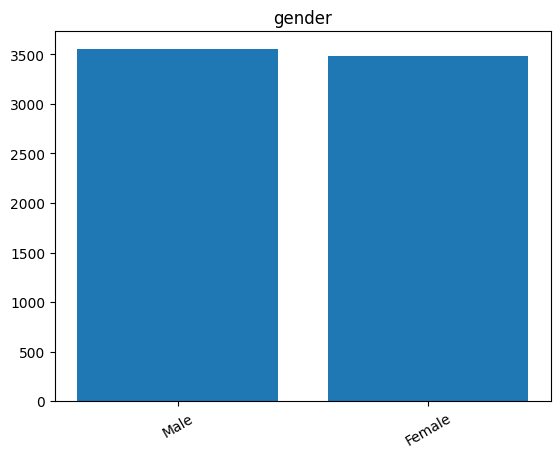

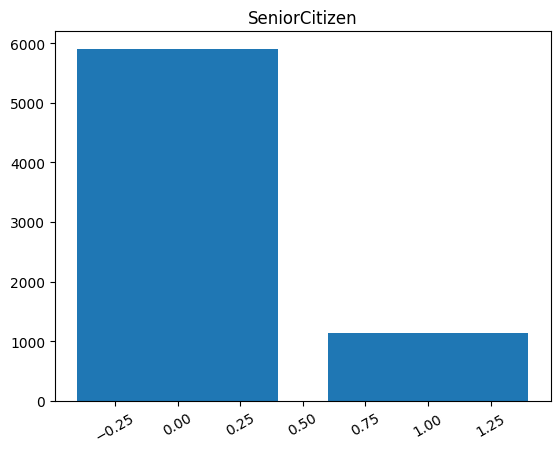

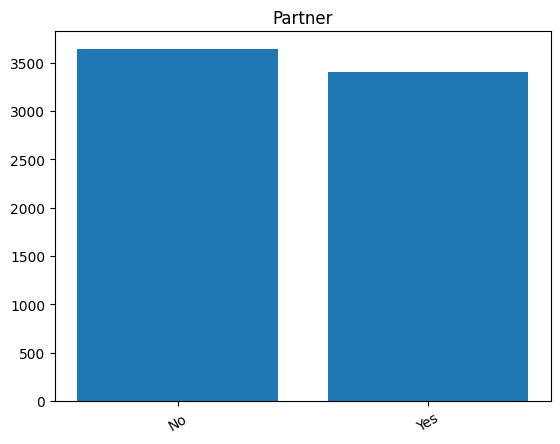

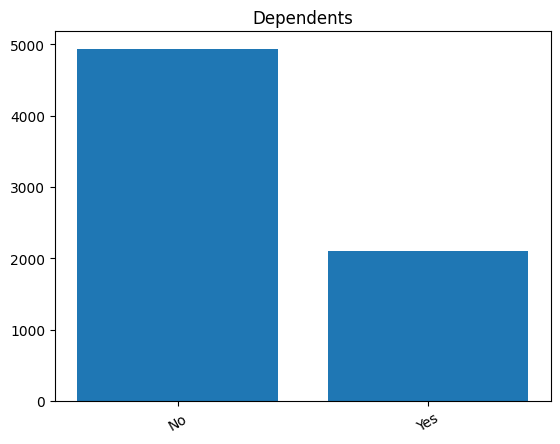

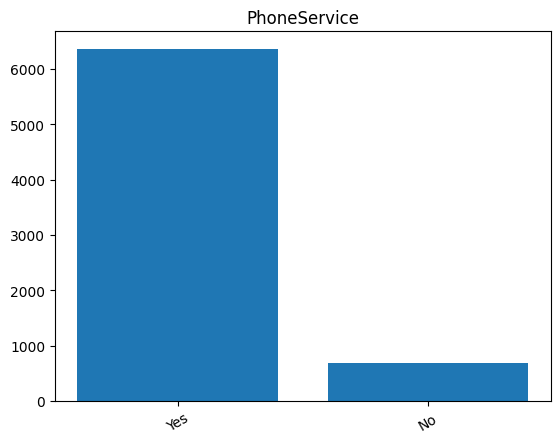

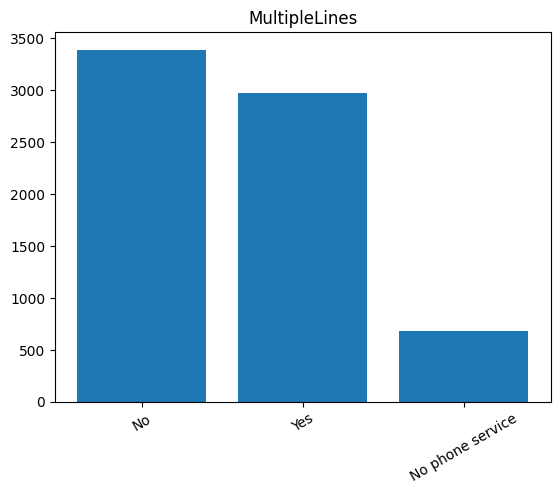

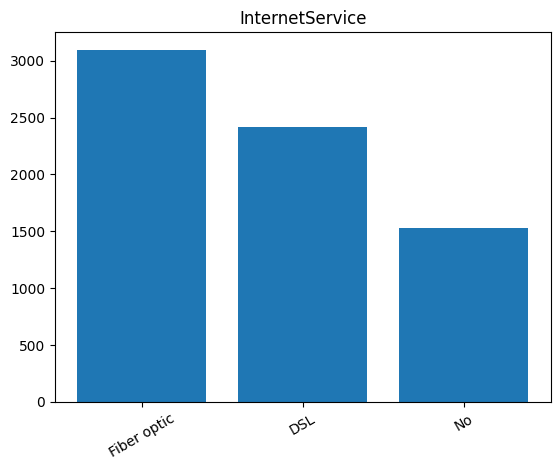

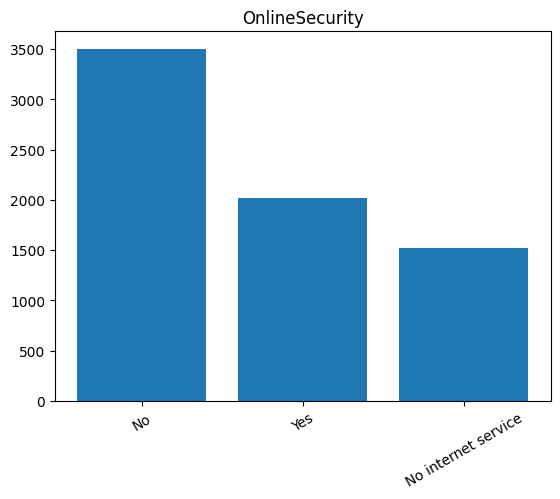

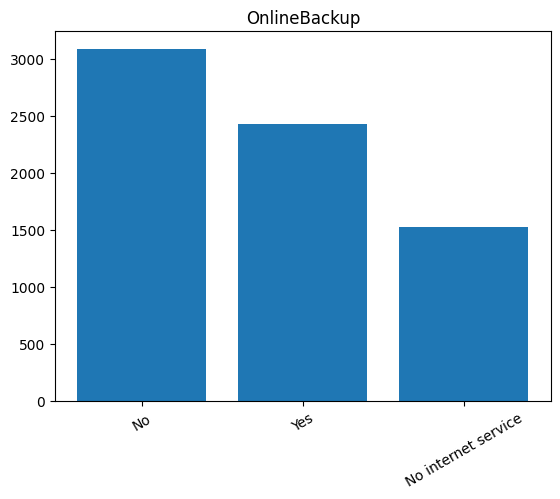

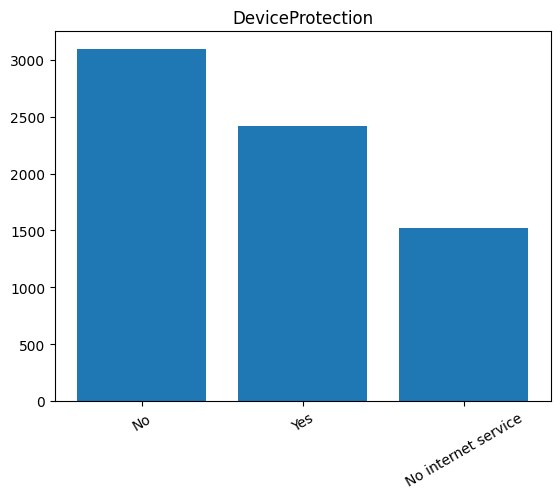

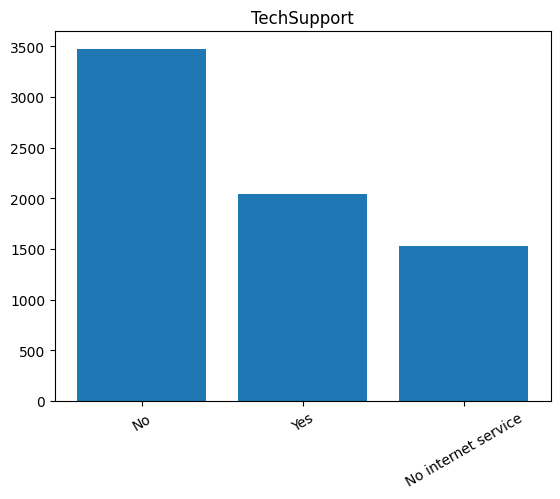

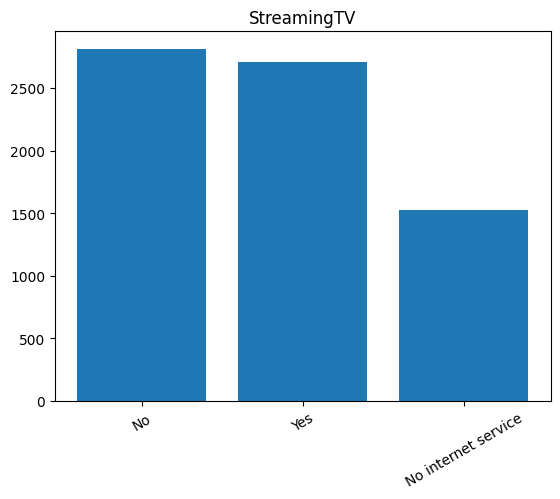

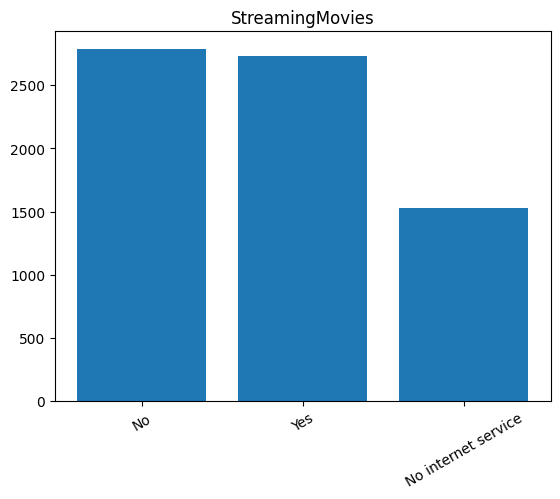

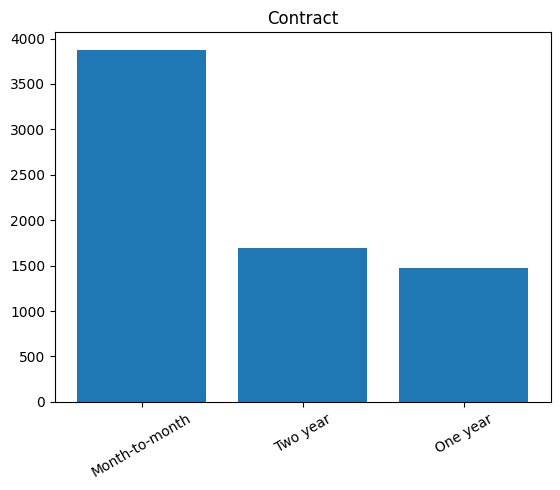

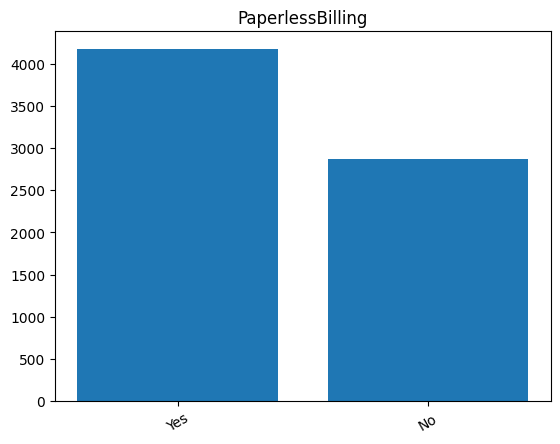

In [ ]:
categorical_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling']
num_columns=['tenure', 'MonthlyCharges', 'TotalCharges']


for i in categorical_columns:
  plt.bar(df[i].value_counts().index, df[i].value_counts())
  plt.title(i)
  plt.xticks(rotation=30)
  plt.show()

for i in categorical_columns:
  plt.bar(df[i].value_counts().index, df[i].value_counts())
  plt.title(i)
  plt.xticks(rotation=30)
  plt.show()

In [ ]:
#We check integer columns which behave as flag featurse. to realize if there is any noise in it.
#Although types of Internation Plan, PhoneServices, priority and InternetSevices are float, they are flag.

# import matplotlib.pyplot as plt
# import seaborn as sns
# for i in df.columns:
#   if i not in ['customerID','tenure', 'TotalCharges', 'MonthlyCharges','SeniorCitizens']:
#    plt.bar(df[i].value_counts().index, df[i].value_counts())
#    plt.title(i)
#    plt.xticks(rotation=30)
#    plt.show()

In [ ]:
#by seeing the result, we recognize that we have a noise in priority column (9), and we replace it with 0.

df['gender']=np.where(df['gender']=='Male',1,0)

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in yes_no_columns:
  df[i]=np.where(df[i]=='Yes',1,0)

# one_hot_columns = ['InternetService', 'Contract', 'PaymentMethod']

# df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

df.dtypes


,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,object
OnlineSecurity,int64


In [ ]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:

#Here we detect outliers in each column. Based on previous part, we don't have any problem with integer column.
#So let's focus on Float columns

def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

candidate_cols = [col for col in df.columns if (df[col].nunique() > 2) and (df[col].dtype in ['float64', 'int64'])]


for i in candidate_cols:
    outliers = detect_outliers(df[i]).count()
    print(f"Outliers in column {i}: {outliers}")


Outliers in column tenure: 0
Outliers in column MonthlyCharges: 0
Outliers in column TotalCharges: 0


In [ ]:
df.isnull().sum()
# for i in ['Age', 'Fare']:
#   Q1 = df[i].quantile(0.25)
#   Q3 = df[i].quantile(0.75)
#   IQR = Q3 - Q1
#   lower= Q1 - 1.5 * IQR
#   upper= Q3 + 1.5 * IQR
#   df[i]=np.where(df[i]>upper, upper,df[i])
#   df[i]=np.where(df[i]<lower, lower,df[i])
#   dft[i]=np.where(dft[i]<lower, lower,dft[i])
#   dft[i]= np.where(dft[i]>upper, upper,dft[i])

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
for i in ['TotalCharges']:
  df[i].fillna(value=df[i].median(), inplace=True)


# for j in ['Age']:
#    df[j].fillna(value=df[j].median(), inplace=True)
#    dft[j].fillna(value=df[j].median(), inplace=True)

# dft['Fare']=dft['Fare'].fillna(value=dft['Fare'].median())
# df.describe()

/tmp/ipython-input-3435244319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(value=df[i].median(), inplace=True)


In [ ]:
#Here we normalize our data
columns_to_normalized = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in columns_to_normalized:
    df[i]=(df[i] - df[i].min())/(df[i].max()-df[i].min())

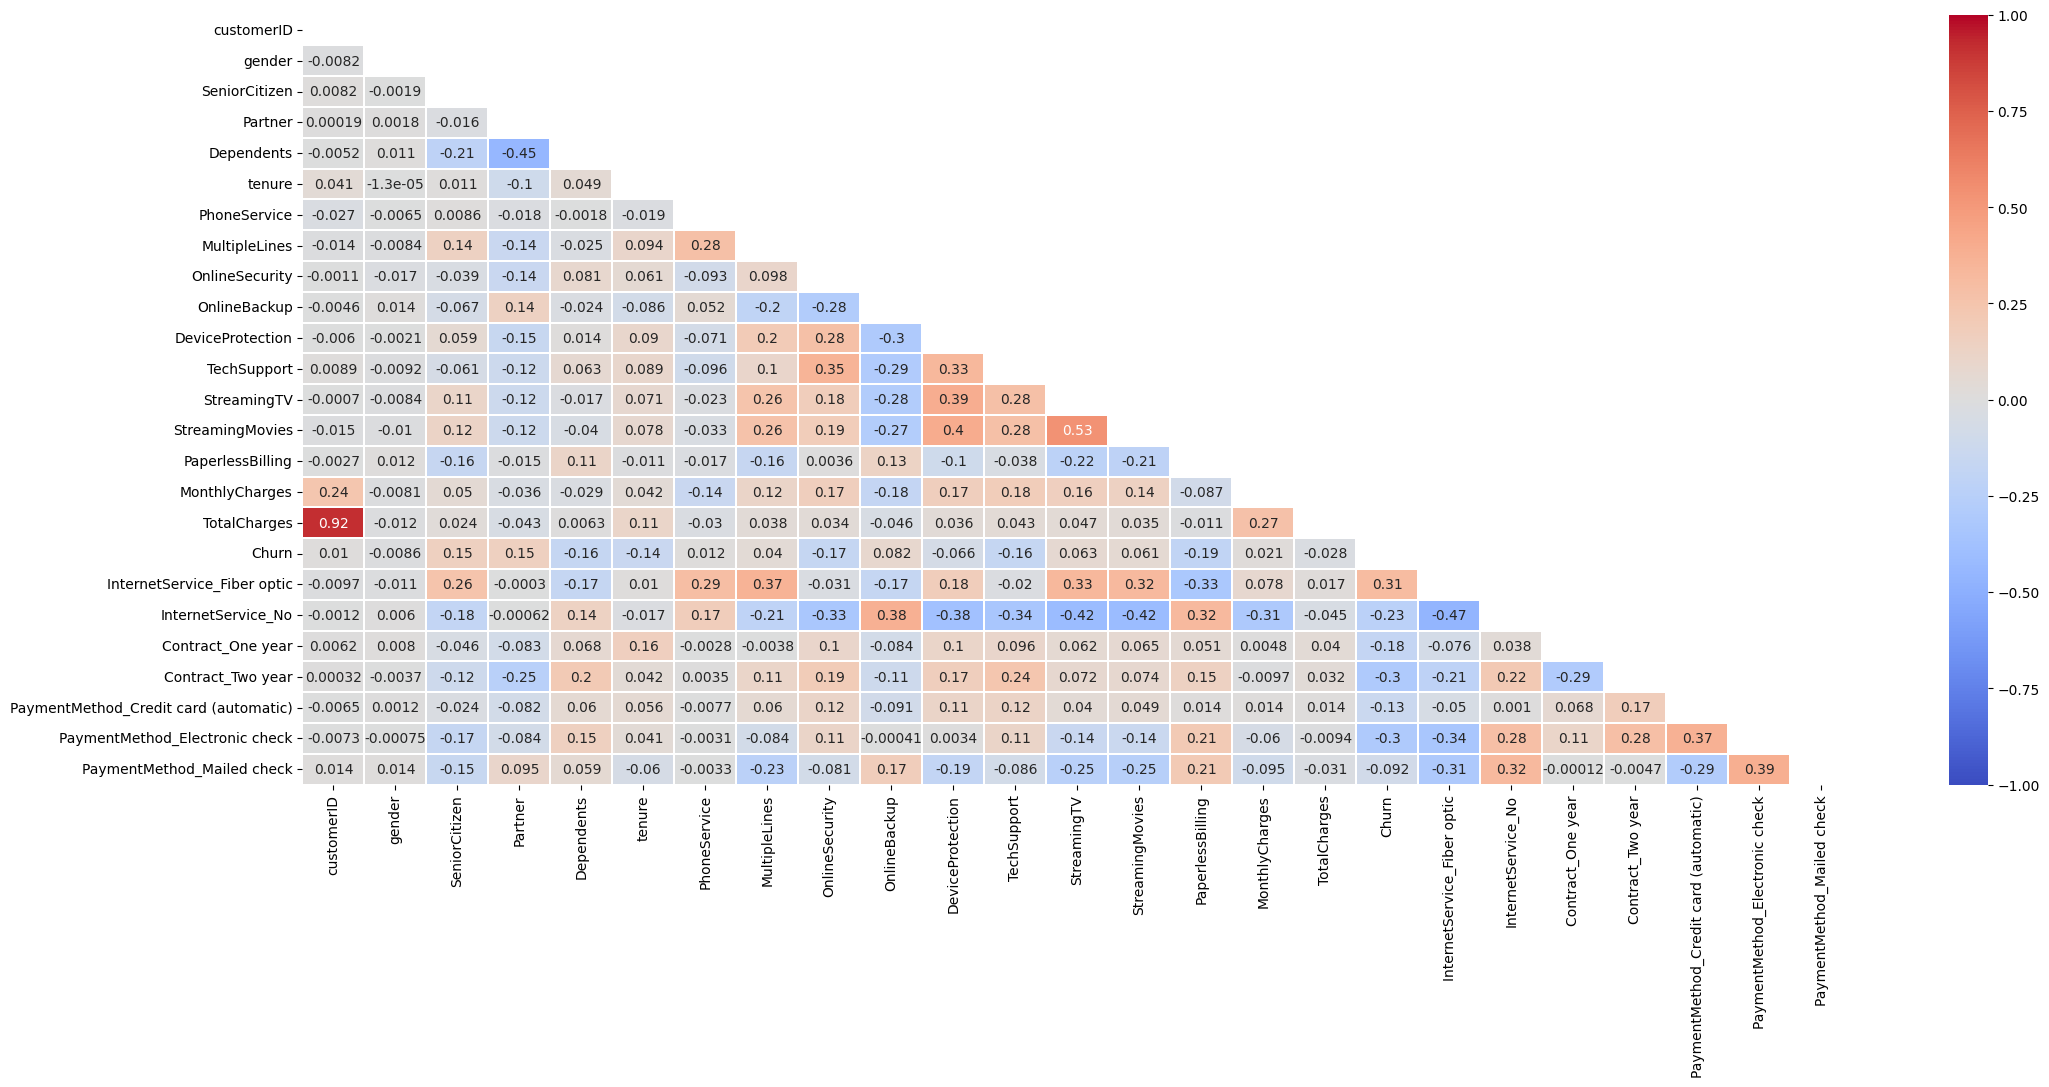

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply().corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn', 'customerID'])
y=df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=141)

y_train.value_counts()

,count
Churn,
0,4140
1,1494


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,6),
    'min_samples_split': range(2,5),
    'min_samples_leaf': range(2,5),
    }



clf = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(estimator=clf, param_grid=tree_param_grid, cv=5, scoring='accuracy')

grid_tree.fit(X_train, y_train)


tree_best_params = grid_tree.best_params_
print("Best parameters:", tree_best_params)


best_dt = grid_tree.best_estimator_

train_accuracy = best_dt.score(X_train, y_train)


ytree_hat = best_dt.predict(X_val)
ytree_hat_train = best_dt.predict(X_train)

test_accuracy = accuracy_score(y_val, ytree_hat)

print (train_accuracy)
print (test_accuracy)
print("Report for train:\n",classification_report(y_train, ytree_hat_train))

print("Report for test:\n",classification_report(y_val, ytree_hat))


confusion_matrix(y_val, ytree_hat)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7902023429179978
0.7913413768630234
Report for train:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4138
           1       0.63      0.50      0.56      1496

    accuracy                           0.79      5634
   macro avg       0.73      0.70      0.71      5634
weighted avg       0.78      0.79      0.78      5634

Report for test:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



array([[924, 112],
       [182, 191]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': range(2,10)
}



grid_knn = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='accuracy')

grid_knn.fit(X_train, y_train)


knn_best_params = grid_knn.best_params_
print("Best parameters:", knn_best_params)


best_knn = grid_knn.best_estimator_

train_accuracy = best_knn.score(X_train, y_train)


yknn_hat = best_knn.predict(X_val)
test_accuracy = accuracy_score(y_val, yknn_hat)

print (train_accuracy)
print (test_accuracy)
confusion_matrix(y_val, yknn_hat)
print(classification_report(y_val, yknn_hat))




In [ ]:
from sklearn.neural_network import MLPClassifier


parameter_space = {
    'hidden_layer_sizes': [(60,30),(100,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha':  [0.04],
    'learning_rate': ['adaptive'],
    'max_iter':[700]}

nn=MLPClassifier(random_state=110)

grid_nn = GridSearchCV (estimator=nn, param_grid=parameter_space, cv=5, scoring='accuracy',n_jobs=-1)


grid_nn.fit(X_train, y_train)


nn_best_params = grid_nn.best_params_
print("Best parameters:", nn_best_params)


best_nn = grid_nn.best_estimator_

yn_hat=best_nn.predict(X_val)


print('nn_train_accuracy = ',best_nn.score(X_train, y_train))

print('nn_test_accuracy=' ,accuracy_score(y_val,yn_hat))
confusion_matrix(y_val, yn_hat)

In [ ]:
from sklearn import svm

parameter_svm = {
    'kernel': ['poly','linear', 'rbf'],
    'degree': range(2,5),
    'gamma' : ['scale', 'auto']
}

svmc=svm.SVC(random_state=100)

grid_svm = GridSearchCV (estimator=svmc, param_grid=parameter_svm, cv=5, scoring='accuracy')

grid_svm.fit(X_train, y_train)


svm_best_params = grid_svm.best_params_
print("Best parameters:", svm_best_params)


best_svm = grid_svm.best_estimator_

ysvm_hat=best_svm.predict(X_val)

svm_accuracy = accuracy_score(y_val, ysvm_hat)

print('svm_train_accuracy = ',best_svm.score(X_train, y_train))

print("svm_test_Accuracy:", svm_accuracy)

confusion_matrix(y_val, ysvm_hat)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameter_rf = {
    'n_estimators': range(5,12),
    'max_depth': range (2,6),
    'max_features' : ["sqrt", None]
}

rf = RandomForestClassifier(random_state=110, n_jobs=-1)



grid_rf = GridSearchCV (estimator=rf, param_grid=parameter_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


rf_best_params = grid_rf.best_params_
print("Best parameters:", rf_best_params)


best_rf = grid_rf.best_estimator_

yrf_hat=best_rf.predict(X_val)

rf_accuracy = accuracy_score(y_val, yrf_hat)

print('rf_train_accuracy = ',best_rf.score(X_train, y_train))

print("rf_test_Accuracy:", rf_accuracy)

print(classification_report(y_val, yrf_hat))

confusion_matrix(y_val, yrf_hat)

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 29.8 MB/s eta 0:00:00


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report


ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
def objective(trial):
    # تعریف بازه‌های جستجو
    param = {
        'max_depth': trial.suggest_int('max_depth', 4, 7),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-1, 10.0, log=True),
        'eval_metric': 'logloss',
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10)


        }
    ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
    model = xgb.XGBClassifier(**param,  scale_pos_weight=ratio)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()

# ساخت مطالعه و بهینه‌سازی
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # تعداد دفعات تست


# بهترین پارامترها
print("Best parameters:", study.best_params)

# آموزش مدل نهایی با بهترین پارامترها
best_xgb = xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# ارزیابی روی Validation
yxgb_hat = best_xgb.predict(X_val)
yxgb_hat_train = best_xgb.predict(X_train)

# print("Train Accuracy:", best_xgb.score(X_train, y_train))

# print("Validation Accuracy:", accuracy_score(y_val, yxgb_hat))
print("Report for train:\n",classification_report(y_train, yxgb_hat_train))

print("Report for test:\n",classification_report(y_val, yxgb_hat))



[I 2025-10-07 13:21:07,959] A new study created in memory with name: no-name-7bf2f3a5-868f-4e7e-bf4f-af538d878eb2
[I 2025-10-07 13:21:11,572] Trial 0 finished with value: 0.7580783954635216 and parameters: {'max_depth': 6, 'n_estimators': 860, 'learning_rate': 0.03600730443490185, 'reg_lambda': 0.36473781451051895, 'subsample': 0.8157381962735133, 'colsample_bytree': 0.8012376501739182, 'min_child_weight': 9}. Best is trial 0 with value: 0.7580783954635216.
[I 2025-10-07 13:21:16,506] Trial 1 finished with value: 0.7484951166349619 and parameters: {'max_depth': 4, 'n_estimators': 1019, 'learning_rate': 0.12013626006877287, 'reg_lambda': 2.2267982469023093, 'subsample': 0.6018777328405099, 'colsample_bytree': 0.7055837941529971, 'min_child_weight': 9}. Best is trial 0 with value: 0.7580783954635216.
[I 2025-10-07 13:21:34,365] Trial 2 finished with value: 0.7632216497688734 and parameters: {'max_depth': 7, 'n_estimators': 710, 'learning_rate': 0.0019113081892893579, 'reg_lambda': 0.4837

Best parameters: {'max_depth': 6, 'n_estimators': 1041, 'learning_rate': 0.006081349355434312, 'reg_lambda': 8.59621884156855, 'subsample': 0.6340092023295754, 'colsample_bytree': 0.8435952287188992, 'min_child_weight': 3}
Report for train:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4140
           1       0.74      0.59      0.66      1494

    accuracy                           0.84      5634
   macro avg       0.80      0.76      0.78      5634
weighted avg       0.83      0.84      0.83      5634

Report for test:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1034
           1       0.66      0.53      0.58       375

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold


def objective(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 200, 1500),
        "depth": trial.suggest_int("depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "verbose": 0,
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "rsm": trial.suggest_float("rsm", 0.5, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 7)
        }


    model = CatBoostClassifier(**param, early_stopping_rounds=150)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=141)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best trial:")
print(study.best_trial.params)

# گرفتن بهترین پارامترها از Optuna
best_params = study.best_trial.params

# ساخت مدل CatBoost با بهترین پارامترها
final_cb = CatBoostClassifier(
    **best_params,
    verbose=0,

)

# آموزش مدل روی داده‌های Train
final_cb.fit(X_train, y_train)

# پیش‌بینی
y_train_pred = final_cb.predict_proba(X_train)[:,'ye']
y_train_tuned = (y_train_pred > 0.4).astype(int)
y_val_pred = final_cb.predict_proba(X_val)[:,1]
y_val_tuned = (y_val_pred > 0.4).astype(int)


# محاسبه دقت
# train_acc = accuracy_score(y_train, y_train_pred)
# val_acc = accuracy_score(y_val, y_val_pred)

# نمایش
# print("✅ Train Accuracy:", train_acc)
# print("✅ Validation Accuracy:", val_acc)
print("Report for train:\n",classification_report(y_train, y_train_tuned))

print("Report for test:\n",classification_report(y_val, y_val_tuned))

[I 2025-10-08 08:20:21,908] A new study created in memory with name: no-name-78f4df25-144d-48d1-ac44-6a7492b19815
[W 2025-10-08 08:20:21,945] Trial 0 failed with parameters: {'iterations': 1276, 'depth': 6, 'learning_rate': 0.03634997573393221, 'l2_leaf_reg': 2.6379152958495653, 'subsample': 0.6031371091134095, 'rsm': 0.9557879945443153, 'random_strength': 9.321349687193388, 'bagging_temperature': 1.8939915640961145} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n1 fits failed with the following error:\nTraceback (most recent call last):\n  File "_catboost.pyx", line 2534, in _catboost.get_float_feature\n  File "_catboost.pyx", line 1228, in _catboost._FloatOrNan\n  File "_catboost.pyx", line 1023, in _catboost._FloatOrN

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2534, in _catboost.get_float_feature
  File "_catboost.pyx", line 1228, in _catboost._FloatOrNan
  File "_catboost.pyx", line 1023, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'Fiber optic' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4329, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4381, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4190, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3114, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2578, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2536, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=7]="Fiber optic": Cannot convert 'Fiber optic' to float

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2534, in _catboost.get_float_feature
  File "_catboost.pyx", line 1228, in _catboost._FloatOrNan
  File "_catboost.pyx", line 1023, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'No' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4329, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4381, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4190, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3114, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2578, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2536, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=7]="No": Cannot convert 'No' to float


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score


# تابع هدف برای Optuna
def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'objective': 'binary',       # چون دیتای Titanic دوتاییه
        'metric': 'binary_logloss'   # می‌تونستی AUC هم بذاری
    }

    model = lgb.LGBMClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()

# اجرای مطالعه
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# بهترین پارامترها
print("Best parameters:", study.best_params)

# آموزش مدل نهایی با بهترین پارامترها
best_lgb = lgb.LGBMClassifier(**study.best_params)
best_lgb.fit(X_train, y_train)

# پیش‌بینی و ارزیابی
ylgb_hat = best_lgb.predict(X_val)
print("Train Accuracy:", best_lgb.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, ylgb_hat))

print("Classification Report:\n", classification_report(y_val, ylgb_hat))

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# مدل‌های پایه
base_learners = [
    #('knn', best_knn),
    #('mlp', best_nn),
    ('xgb', best_xgb),
    ('cat', final_cb),
    #('dt', best_dt),
    #('rf', best_rf)
]

# مدل متا (معمولاً Logistic Regression خوب جواب می‌ده)
meta_learner = LogisticRegression()

# ساخت StackingClassifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,               # کراس ولیدیشن
    stack_method="predict_proba"   # استفاده از احتمال‌ها به جای پیش‌بینی خشک
)

# آموزش
stack_model.fit(X_train, y_train)

# ارزیابی
y_pred = stack_model.predict(X_val)
y_pred_train=stack_model.predict(X_train)
print("Stacking Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Stacking Validation Accuracy:", accuracy_score(y_val, y_pred))



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:58] WARNING: /w

Stacking Train Accuracy: 0.8283635072772453
Stacking Validation Accuracy: 0.8062455642299503


In [ ]:
X_test=dft.iloc[:,1:]
X_test.head()
y_hat=pd.DataFrame(final_cb.predict(X_test),columns=['Survived'])
y_hat.value_counts()
y_hat.to_csv("output.csv", index=False)
